### Google.colab
Only execute this cell when use on google colab platform (colab).

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/Nak007/model_validation">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [ ]:
# Mount with google drive.
from google.colab import drive
drive.mount('/content/dirve')

# Import other libraries required.
# All *.py will be stored under the following 
# location i.e. '/content/supervised_binning'.
!git clone 'http://github.com/Nak007/model_validation.git'

## Example

In [1]:
import pandas as pd, numpy as np, sys
import matplotlib.pyplot as plt

sys.path.append('/content/model_validation')
from model_validation import *
pd.options.display.float_format = '{:,.4f}'.format

In [19]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples     = 1000, 
                           n_features    = 50, 
                           n_informative = 15, 
                           n_redundant   = 20, 
                           random_state  = 0, 
                           shuffle       = True, 
                           n_classes     = 2, 
                           weights       = [0.7, 0.3])

X = pd.DataFrame(X, columns=["feature_" + str(n).zfill(2) 
                             for n in range(1,X.shape[1]+1)]) 

In [20]:
from sklearn.ensemble import RandomForestClassifier

init_kwargs = {"random_state": 0, 
               "n_estimators": 50, 
               "n_jobs"      : -1, 
               'max_depth'   : 5, 
               "max_features": 5}

clf = RandomForestClassifier(**init_kwargs).fit(X, y)

In [21]:
y_proba = clf.predict_proba(X)[:,1].ravel()

**<font size=4>( 1 ) Type I and Type II errors</font>**

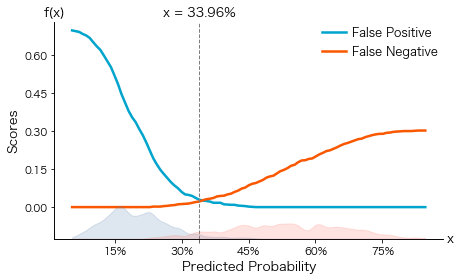

In [88]:
ax = error_plot_base(y, y_proba)

**<font size=4>( 2 ) F1-Score</font>**

The F-score, also called the F1-score, is a measure of a model’s accuracy on a dataset. It is used to evaluate binary classification systems, which classify examples into ‘positive’ or ‘negative’. The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall.

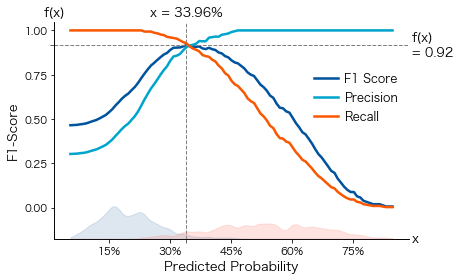

In [89]:
ax = f1score_plot_base(y, y_proba)

**<font size=4>( 3 ) Gini index</font>**

The `ROC` curve is the display of `sensitivity` and `1-specificity` for different cut-off values for probability (If the probability of positive response is above the cut-off, we predict a positive outcome, if not we are predicting a negative one). Each cut-off value defines one point on `ROC` curve, ranging cut-off from 0 to 1 will draw the whole `ROC` curve. Moreover, `sensitivity` measures the rate of correctly predicted samples with a positive response, while `1-specificity` measures the rate of incorrectly predicted samples with a negative response. Both parameters can be expressed as follows;

- $sensitivity = \frac{TP}{(TP + FN)}$
- $1 - specificity = 1 - \frac{TN}{(TN + FP)}$ or $\frac{FP}{(TN + FP)}$

The `Gini` coefficient is the area or ROC curve above the random classifier (diagonal line) that indicates the model’s discriminatory power, namely, the effectiveness of the model in differentiating between target, and non-target (binary classification). `Gini` can be expressed mathematically as follows;

- $Gini = 2(AUC) - 1$, where `AUC` is Area Under `ROC` curve

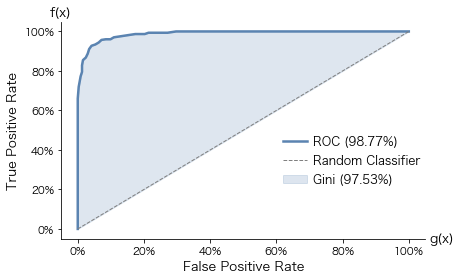

In [90]:
ax = gini_plot_base(y, y_proba)

**<font size=4>( 4 ) Distribution plot</font>**

Distribution plot is intended to illustrate the separation of two distributions from binary classification, according to obtained probabilities.

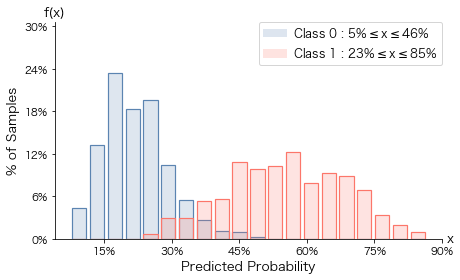

In [97]:
ax = dist_plot_base(y, y_proba, use_kde=False, bins=20)

**<font size=4>( 5 ) Kolmogorov–Smirnov</font>**

The Kolmogorov–Smirnov test is a nonparametric test of the equality of continuous, one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution (one-sample KS test), or to compare two samples.

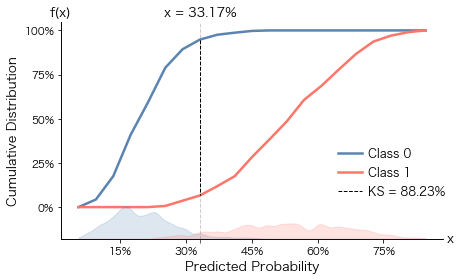

In [92]:
ax = ks_plot_base(y, y_proba)

From `Distibution plot`, and `Kolmogorov–Smirnov` test, they clearly illustrate the separation between two distributions. The former allows dissimilarity of two distributions to be either identified from visual observation or quantified by performing statistical means such as `Student's t-test` or `Chi-squared test`. The latter uses a maximum distance (`KS`) between two empirical distribution functions of two samples.

**<font size=4>( 6 ) Gains chart</font>**

`Gains` chart is used to evaluate performance of classification model. It measures how much better one can expect to do with the predictive model comparing without a model (randomness). It plots the cumulative percentage of predicted samples (x-axis) against the cumulative percentage of correctly predicted samples with a positive response (y-axis).

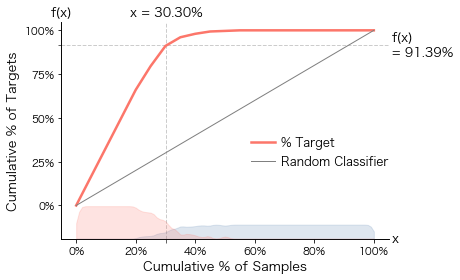

In [93]:
ax = gains_plot_base(y, y_proba)

**<font size=4>( 7 ) Cumulative lift</font>**

Cumulative lift measures how much better one can expect to do with the predictive model comparing without a model (randomness). Lift is the ratio of cumulative targets to cumulative samples. Moreover, probability must be ordered in descending manner before grouping into deciles.

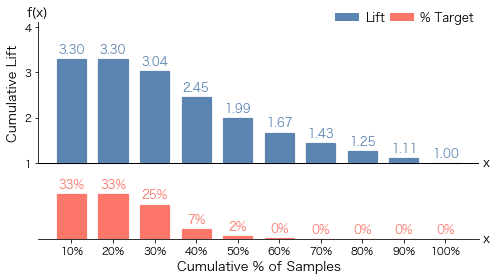

In [94]:
ax = cumulift_plot_base(y, y_proba)

**<font size=4>( 8 ) Decile lift</font>**

Unlike `cumulative lift`, `decile lift` uses target and support based on the given decile (not cumulative). It measures how much gains of additional samples would contribute to the prediction comparing without a model (randomness). If `decile lift` is having value larger than 1, that means such decile is better at predicting target than random selection, and if it is less than 1, the model is better at predicting non-target.

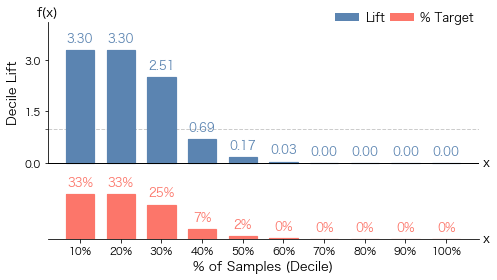

In [95]:
ax = declift_plot_base(y, y_proba)

**<font size=4>( 9 ) Target ratio</font>**

The `target ratio` or `target rate` is the number of actual targets over number of targeted samples in each decile. It shows how well predictive model can assign positive response with high probability and negative response with low probability. If the model has a high discriminatory power, the target rate should form a downward pattern.

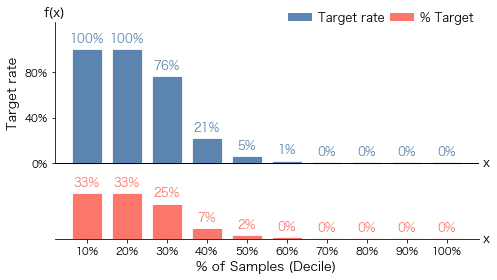

In [96]:
ax = target_plot_base(y, y_proba)

**<font size=4>( 10 ) eval_classifier</font>**

`eval_classifier` provides a quick access to all evaluation methods under "**model_validation.py**". Moreover, it also allows adjustment or modification to be made to any particular plot.

In [76]:
evaluation = eval_classifier(ax_dict={"hist":{"bins":20, "use_kde":True}})

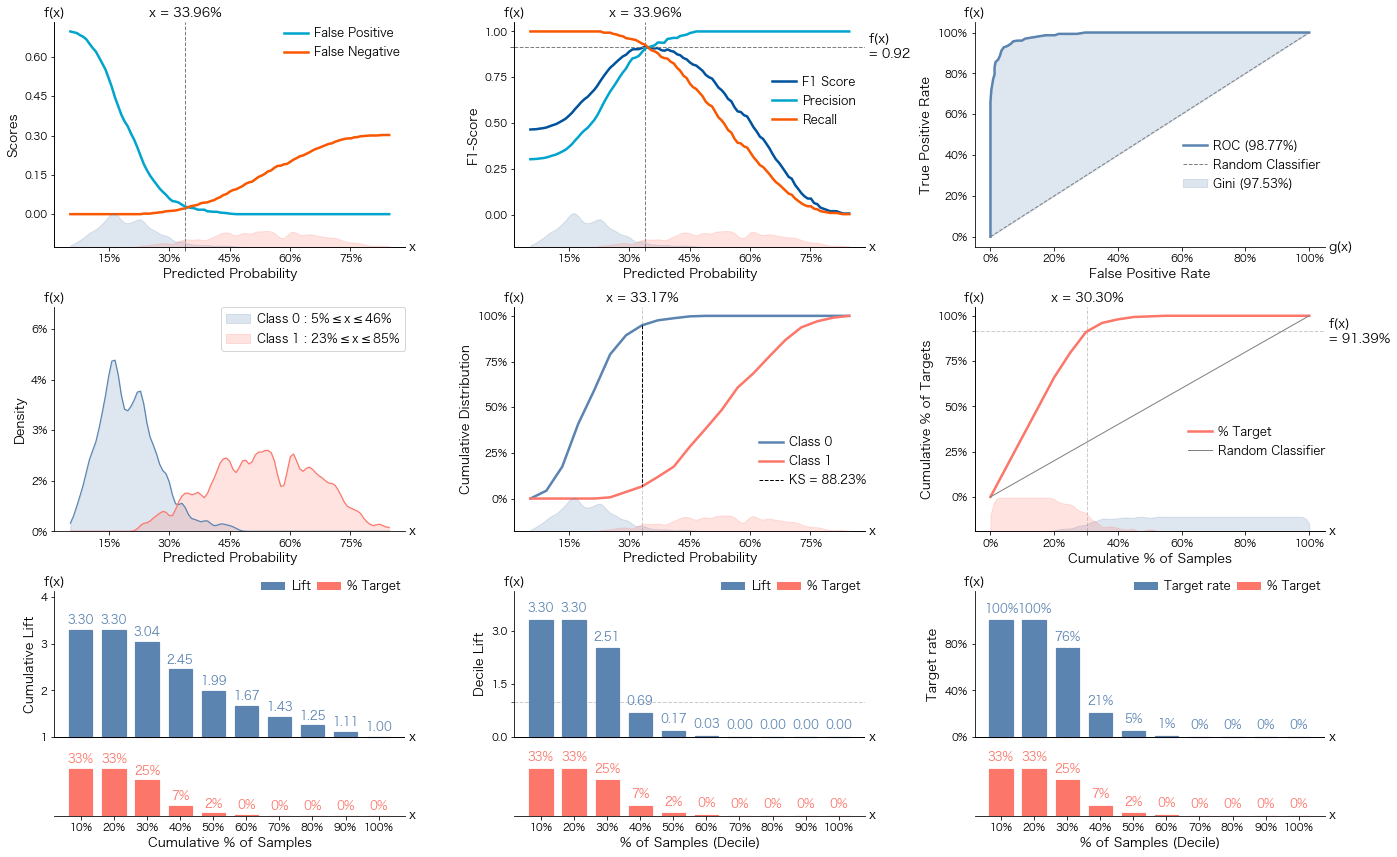

In [86]:
ax = evaluation.plot_all(y, y_proba)